In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
mnistDB = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnistDB.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of x_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)


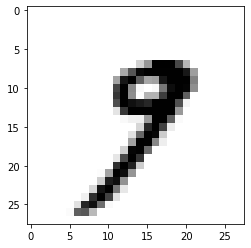

In [4]:
plt.imshow(x_train[33],cmap='binary')
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)

In [7]:
cnnModel_MNIST = keras.models.Sequential()

cnnModel_MNIST.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=x_train.shape[1:]))
cnnModel_MNIST.add(keras.layers.Conv2D(32,(3,3),activation="relu"))
cnnModel_MNIST.add(keras.layers.MaxPooling2D((2,2)))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))

cnnModel_MNIST.add(keras.layers.Flatten())

cnnModel_MNIST.add(keras.layers.Dense(128,activation="relu"))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))
cnnModel_MNIST.add(keras.layers.Dense(10,activation="softmax"))
cnnModel_MNIST.summary()
cnnModel_MNIST.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
cnnModel_MNIST.fit(x_train,y_train,epochs=1,batch_size=16)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                      